In [1]:
import torch
import os
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from typing import List, Tuple, Dict 
import random
from pathlib import Path

print(f'PyTorch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

PyTorch version: 2.0.1
torchvision version: 0.15.2


In [2]:
img_class_name = {0:'clean', 1:'dirty'}
img_class_name_inverse = {'clean':0, 'dirty':1}

In [3]:
img_partition = {0:'train', 1:'test', 2:'hidden'}
img_partition_inverse = {'train':0, 'test':1, 'hidden':2}

In [4]:
class CudaHelper:
    
    def get_device():
        device = "cuda" if torch.cuda.is_available() else "cpu"
        return device

In [5]:
class ImageItem:
    
    def __init__(self, image:torch.Tensor, full_path:str, image_class:int, image_partition:int):
        self.image = image
        self.full_path = full_path
        self.image_class = image_class
        self.image_partition = image_partition
    
    def stringify(self):
        return f'Class: {img_class_name[self.image_class]}:{self.image_class}. Partition: {img_partition[self.image_partition]}'

In [6]:
class ImageHelper:
    
    def plot_tensor(img:torch.Tensor):
        img_cpu = img.squeeze().to('cpu')
        plt.imshow(img_cpu.permute(1, 2, 0))
        plt.show()
    
    def plot_img(img:ImageItem):
        img_cpu = img.image.squeeze().to('cpu')
        plt.imshow(img_cpu.permute(1, 2, 0))
        plt.title(f'{img.stringify()}')
        plt.show()
    
    def do_load(data_dir:str, partition:str, class_name:str) -> List[ImageItem]:
        all_files = os.listdir(data_dir)
        all_images = []

        for f in all_files:
            full_path = os.path.join(data_dir, f)
            img_tensor = read_image(full_path).to(CudaHelper.get_device())
            ii = ImageItem(img_tensor, full_path, img_class_name_inverse[class_name], img_partition_inverse[partition])
            all_images.append(ii)
        
        return all_images
    
    def load_images(base_dir:str, partition:str) -> List[ImageItem]:        
        cleans = ImageHelper.do_load(os.path.join(base_dir, partition, 'clean'), partition, 'clean')
        dirtys = ImageHelper.do_load(os.path.join(base_dir, partition, 'dirty'), partition, 'dirty')
        return cleans, dirtys

## Print several random images

In [7]:
main_dir = 'C:\\Users\\Valentine\\Downloads\\NeuralNetworks\\plates\\plates\\'

clean_train, dirty_train = ImageHelper.load_images(main_dir, 'train')
clean_test, dirty_test = ImageHelper.load_images(main_dir, 'test')
clean_hidden, dirty_hidden = ImageHelper.load_images(main_dir, 'hidden')

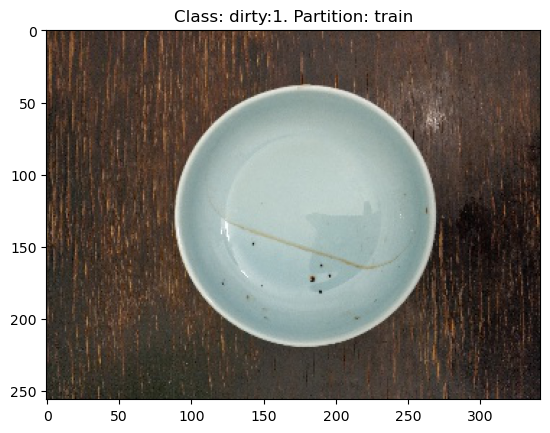

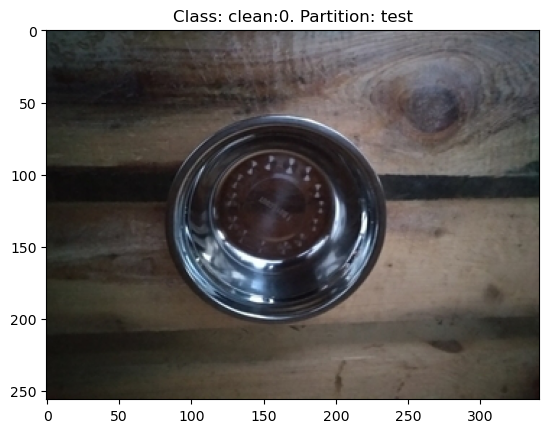

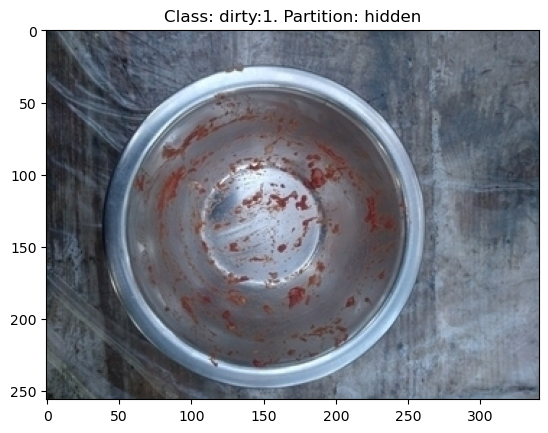

[None, None, None]

In [8]:
to_show = [random.choice(dirty_train), random.choice(clean_test), random.choice(dirty_hidden)]
[ImageHelper.plot_img(i) for i in to_show]